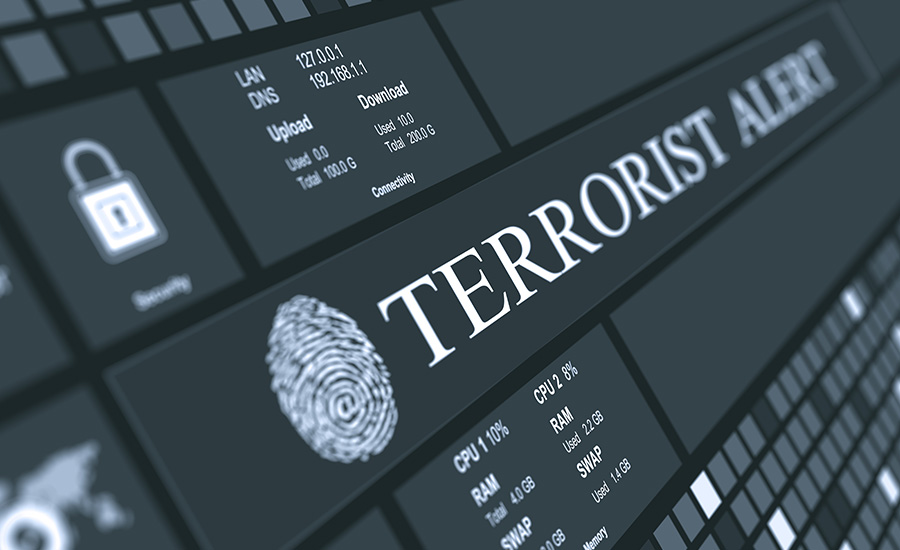

# Table of Contents.
* [Introduction](#Introduction)
* [Data-Cleaning and Pre Processing](#Data)
* [Analysis on Global Data](#GlobalData)
  * [ Global Trend of Terrorism over a span of years](#Globaltrend) 
  *  [Succesfull attempts over the years](#Successful)
  *   [Most active Terrorist Groups](#terrorgroups)
  *   [Common attack types](#Common) 
  *   [Most Effected counties](#globalcountries)
  *   [Hotspot Cities](#Hotspotcities)
  *   [CommonTargets](#CommonTargetGlobal)
  *   [Effected Regions](#EffectedRegions) 
  *   [Regional Trend](#RegionalTrend)
  *   [Region Vs Attack](#RegionVSATTACK)
  *   [Favorite Weapons Used](#WeaponsFav)  
* [Analysis on India](#India) 
   * [Terrorism Trend In India](#TerrorismTrendIndia)
   *    [% successfull vs un successfull](#Succesfulvsuncessful)
   *    [Terrorist Groups and Attacks](#TerroristgroupsIndia)
   *    [Common Target vs Common Attacks ](#CTCA)
   *    [Top Cities, Top States](#TCTS)
* [Middle East  and Northern Africa Analysis](#Middleeast) 
  * [Middle East and Northern Africa vs the world](#MiddleEastvsworld)
  *   [Middle East and Norther America Trend](#METrend)
  *   [Effected Countires and Attack types](#Middlecountries)
  * [Effected Citires](#MeCi)
  *  [Common Attack Vs Common Targets](#CACTM) 

<a id="Introduction"></a>
# Terrorism
Over the past decade, terrorists killed an average of 21,000 people worldwide each year.
The global death toll from terrorism over the past decade ranged from 8,000 in 2010 to a high of 44,000 in 2014.
In 2017, terrorism was responsible for 0.05% of global deaths.
Terrorism tends to be very geographically-focused: 95% of deaths in 2017 occurred in the Middle East, Africa or South Asia.
In most countries terrorism accounts for less than 0.01% of deaths, but in countries of high-conflict, this can be as much as several percent.
Airline hijackings were once common but are very rare today.
Public concern about terrorism is high – in many countries more than half say they are concerned about being a victim.
Media coverage of terrorism is often disproportionate to its frequency and share of deaths.
All our charts on Terrorism
What is terrorism?
In our overview of terrorism, we try to understand how the number of terrorist acts varies around the world and how it has changed over time. To do this, we need a clear and consistent definition of what terrorism is, and how it’s different from any other form of violence. This is not straightforward.

This is my Second Notebook and I have put down all my knowledege,skills thoughts and idea into it. Hope you Like it :)
please do give feedback as it will help me improve:) 

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
        

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns


<a id="Data"></a>
# Data cleaning and pre-processing
The initial data had many irregularities unwanted columns, columns consisting of Irregular values like NaN, Zeros etc.

In [5]:
terrorism_df=pd.read_csv('/Users/harshjaiswal/Desktop/Git/Terror/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
terrorism_df.rename(columns ={'iyear':'Year','imonth':'Month','country_txt':'Country','iday':'Day','region_txt':'Region','provstate':'State','city':'City','success':'Success','attacktype1_txt':'Attacktype','targtype1_txt':'Target','natlty1_txt':'Nationality','gname':'Group_Name','weaptype1_txt':'Weapon_type',},inplace=True);
pd.set_option('display.max_columns', None)
terrorism_df=terrorism_df[['Year','Month','Country','Day','Region','State','City','Success','Attacktype','Target','Nationality','Group_Name','Weapon_type','latitude','longitude','motive',]]
terrorism_df


<ipython-input-5-6858ef7ff2a8>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorism_df=pd.read_csv('/Users/harshjaiswal/Desktop/Git/Terror/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


,Year,Month,Country,Day,Region,State,City,Success,Attacktype,Target,Nationality,Group_Name,Weapon_type,latitude,longitude,motive
0,1970,7,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,18.456792,-69.951164,NaN
1,1970,0,Mexico,0,North America,Federal,Mexico city,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,19.371887,-99.086624,NaN
2,1970,1,Philippines,0,Southeast Asia,Tarlac,Unknown,1,Assassination,Journalists & Media,United States,Unknown,Unknown,15.478598,120.599741,NaN
3,1970,1,Greece,0,Western Europe,Attica,Athens,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,37.997490,23.762728,NaN
4,1970,1,Japan,0,East Asia,Fukouka,Fukouka,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,33.580412,130.396361,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,Somalia,31,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,1,Armed Assault,Military,Somalia,Al-Shabaab,Firearms,2.359673,45.385034,NaN
181687,2017,12,Syria,31,Middle East & North Africa,Lattakia,Jableh,1,Bombing/Explosion,Military,Russia,Muslim extremists,Explosives,35.407278,35.942679,NaN
181688,2017,12,Philippines,31,Southeast Asia,Maguindanao,Kubentog,1,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,6.900742,124.437908,NaN
181689,2017,12,India,31,South Asia,Manipur,Imphal,0,Bombing/Explosion,Government (General),India,Unknown,Explosives,24.798346,93.940430,NaN


In [6]:
terrorism_df.isnull().sum()



Year                0
Month               0
Country             0
Day                 0
Region              0
State             421
City              434
Success             0
Attacktype          0
Target              0
Nationality      1559
Group_Name          0
Weapon_type         0
latitude         4556
longitude        4557
motive         131130
dtype: int64

In [7]:
terrorism_df['State'].fillna('Unknown', inplace=True)
terrorism_df['City'].fillna('Unknown',inplace=True)
terrorism_df['Nationality'].fillna('Unknown',inplace=True)
terrorism_df


,Year,Month,Country,Day,Region,State,City,Success,Attacktype,Target,Nationality,Group_Name,Weapon_type,latitude,longitude,motive
0,1970,7,Dominican Republic,2,Central America & Caribbean,Unknown,Santo Domingo,1,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,18.456792,-69.951164,NaN
1,1970,0,Mexico,0,North America,Federal,Mexico city,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,19.371887,-99.086624,NaN
2,1970,1,Philippines,0,Southeast Asia,Tarlac,Unknown,1,Assassination,Journalists & Media,United States,Unknown,Unknown,15.478598,120.599741,NaN
3,1970,1,Greece,0,Western Europe,Attica,Athens,1,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,37.997490,23.762728,NaN
4,1970,1,Japan,0,East Asia,Fukouka,Fukouka,1,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,33.580412,130.396361,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,Somalia,31,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,1,Armed Assault,Military,Somalia,Al-Shabaab,Firearms,2.359673,45.385034,NaN
181687,2017,12,Syria,31,Middle East & North Africa,Lattakia,Jableh,1,Bombing/Explosion,Military,Russia,Muslim extremists,Explosives,35.407278,35.942679,NaN
181688,2017,12,Philippines,31,Southeast Asia,Maguindanao,Kubentog,1,Facility/Infrastructure Attack,Private Citizens & Property,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,6.900742,124.437908,NaN
181689,2017,12,India,31,South Asia,Manipur,Imphal,0,Bombing/Explosion,Government (General),India,Unknown,Explosives,24.798346,93.940430,NaN


<a id="GlobalData"></a>
# **Analysis on Global Data**

<a id="Globaltrend"></a>
# Global Trend of Terrorism over a span of years.
There has been a sudden spike in the number of terrorist attacks over the years. Following 1970 there has been a small rise in global terrorism however there a huge rise in terrorism post-2000.  The curve seems to have a steep decline after 2017. which seems to be a good news.


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


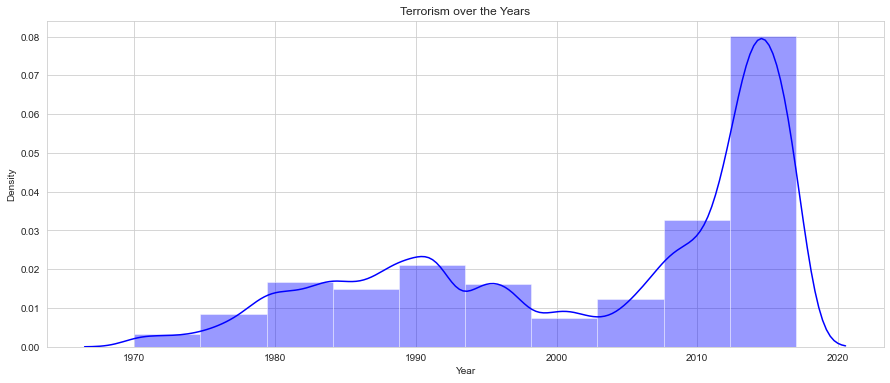

In [8]:
sns.set_style('whitegrid')
terrorism_df.sort_values('Year',ascending=True,inplace=True)
plt.figure(figsize=(15,6))
plt.xlabel('Years')
sns.distplot(terrorism_df.Year,bins=10,color="b").set_title('Terrorism over the Years');


<a id="Successful"></a>
# Successful Attempts over the Years.
89 % of attacks were successful over 50  years. leaving to the fact that only 11 % of the attacks were unsuccessful.


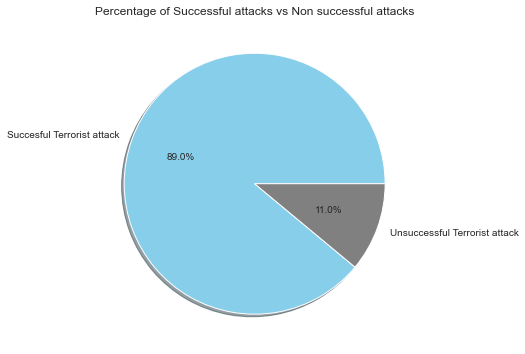

In [9]:
success=terrorism_df.Success.value_counts()
successful_percentage=(success[1]/success.sum())*100
successful_percentage=round(successful_percentage,2)
unsuccessful_percentage=100-successful_percentage
unsuccessful_percentage=round(unsuccessful_percentage,2)
overallattempts=[successful_percentage,unsuccessful_percentage]
label=['Succesful Terrorist attack','Unsuccessful Terrorist attack']
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
plt.title('Percentage of Successful attacks vs Non successful attacks')
plt.pie(overallattempts, colors=['skyblue','Gray'],shadow=True,labels=label, autopct='%1.1f%%');



<a id="#terrorgroups"></a>
# List of most active Terrorist Groups.


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


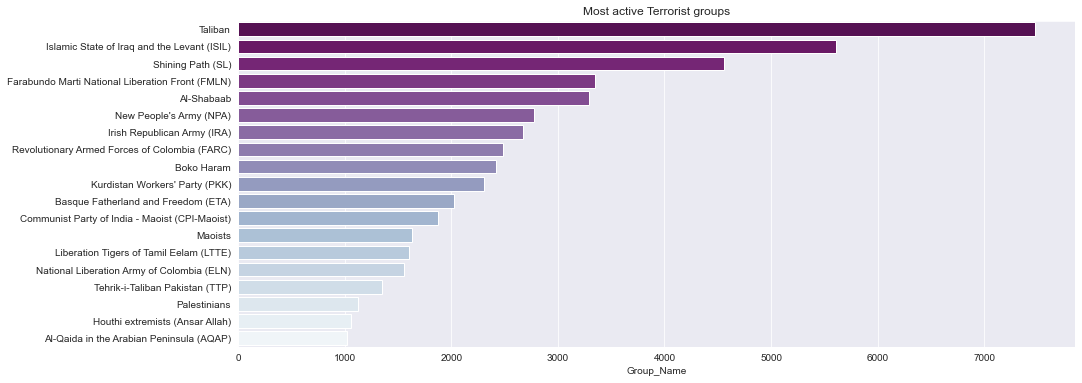

In [10]:
Group_name=terrorism_df.Group_Name.value_counts().head(20)
Group_name=Group_name[1:]
plt.figure(figsize=(15,6))
sns.barplot(Group_name,Group_name.index,palette = "BuPu_r").set_title('Most active Terrorist groups');


<a id="Common"></a>
# Common attack types.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


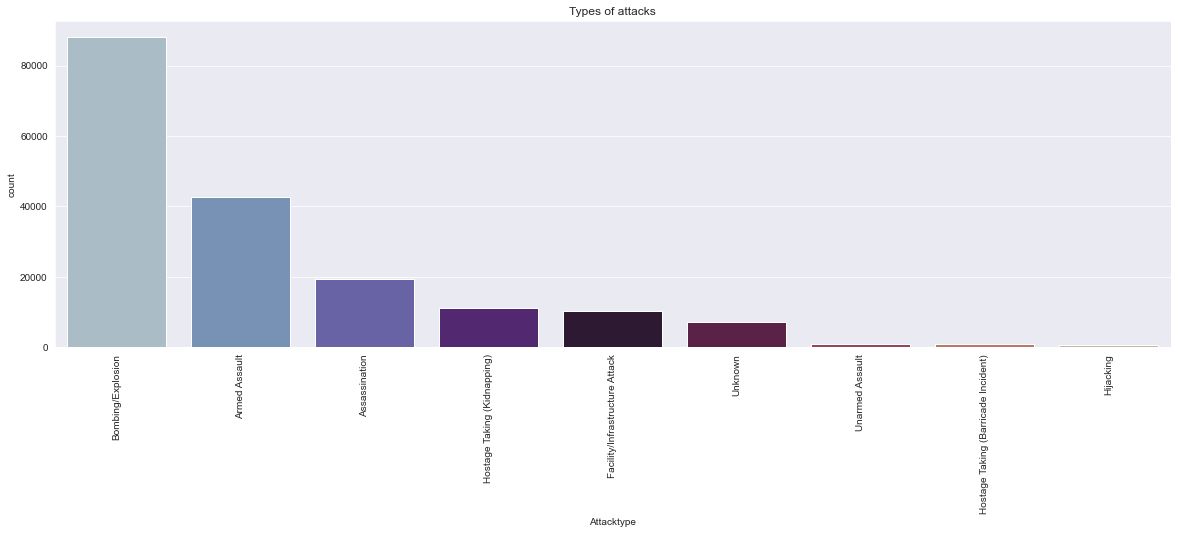

In [11]:
plt.figure(figsize=(20,6))
sns.countplot('Attacktype',data=terrorism_df,palette='twilight',order=terrorism_df['Attacktype'].value_counts().index).set_title("Types of attacks")
plt.xticks(rotation=90);

<a id="globalcountries"></a>
# Most effected Countries.
Majority of these countries are from Asian or middle eastern region followed by African or European Regions.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


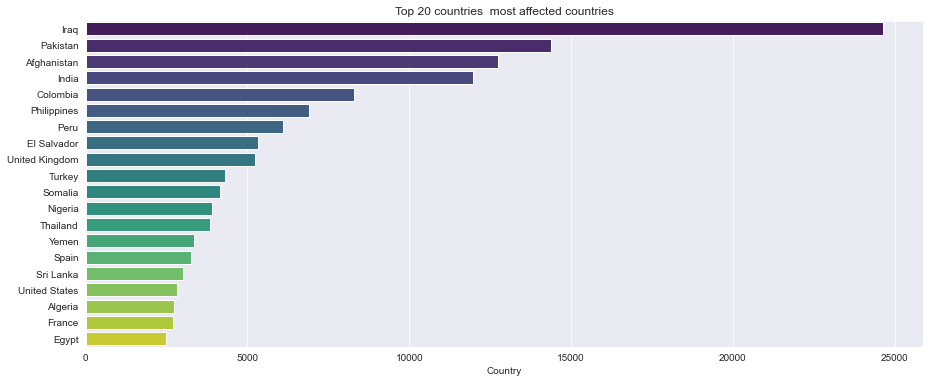

In [12]:
country=terrorism_df.Country.value_counts().head(20)
plt.figure(figsize=(15,6))
sns.barplot(country,country.index,palette='viridis').set_title("Top 20 countries  most affected countries");

<a id='Hotspotcities'></a>
# Hotspot cities.
Bagdad contributes to 4.17% of all terrorist activities. Bagdad stands prominent majorly dominating the rest of hotspot cities.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


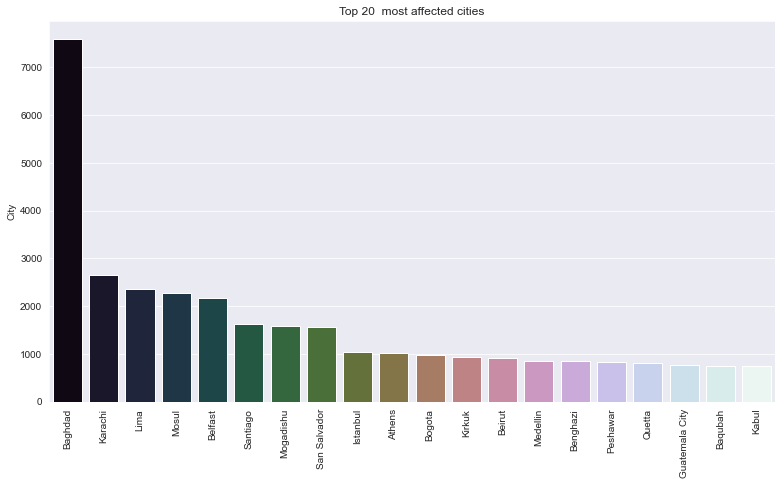

In [13]:
city=terrorism_df.City.value_counts()
city=city[1:]
plt.figure(figsize=(13,7))
city=city.head(20)
sns.barplot(city.index,city,palette='cubehelix').set_title('Top 20  most affected cities');
plt.xticks(rotation=90); 

<a id='CommonTargetGlobal'></a>
# Common Targets:


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


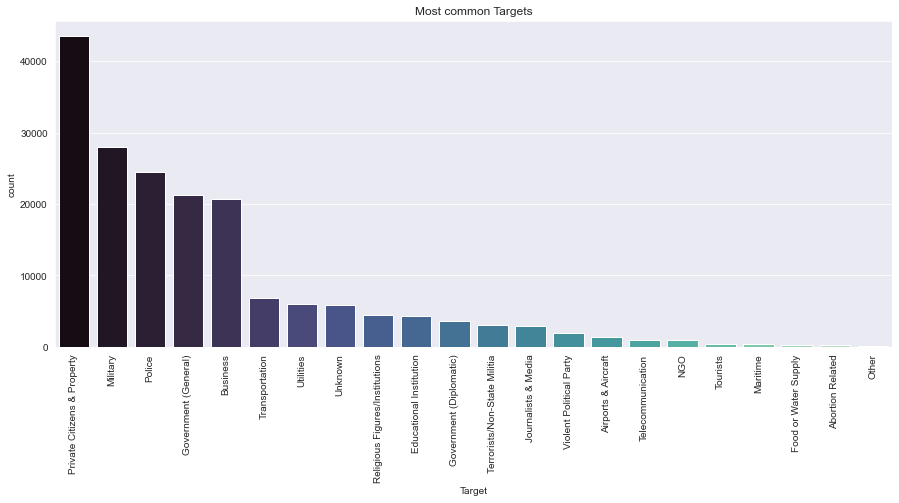

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
sns.countplot('Target',data=terrorism_df,order=terrorism_df['Target'].value_counts().index,palette='mako').set_title('Most common Targets');
plt.xticks(rotation=90);

<a id='EffectedRegions'></a>
# Most Affected Regions.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


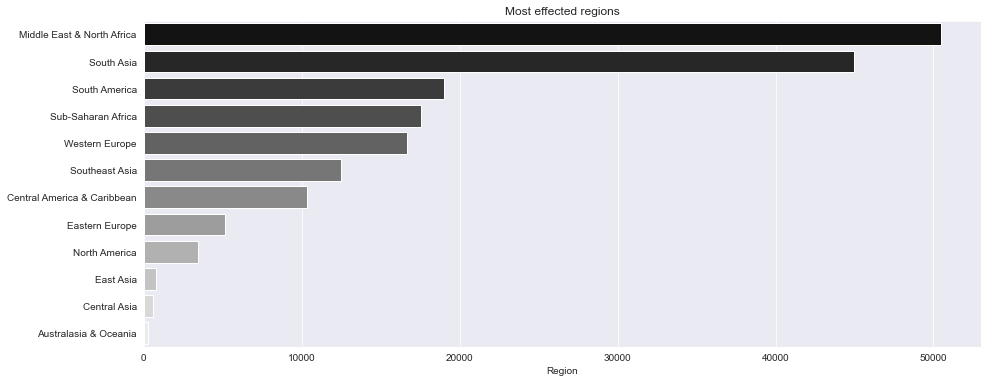

In [15]:
Region=terrorism_df.Region.value_counts()
plt.figure(figsize=(15,6))
sns.barplot(Region,Region.index,palette='gist_gray').set_title('Most effected regions');


<a id=#RegionalTrend></a>
#  Terrorism Trends Graph or How terrorism has impacted over the years on Certain Regions.
There seems a dip in terrorism in the regions of Middle East & North America. How ever regions like Southern Asia, Easter Europe there isnt any decline , the rate is low and constant.

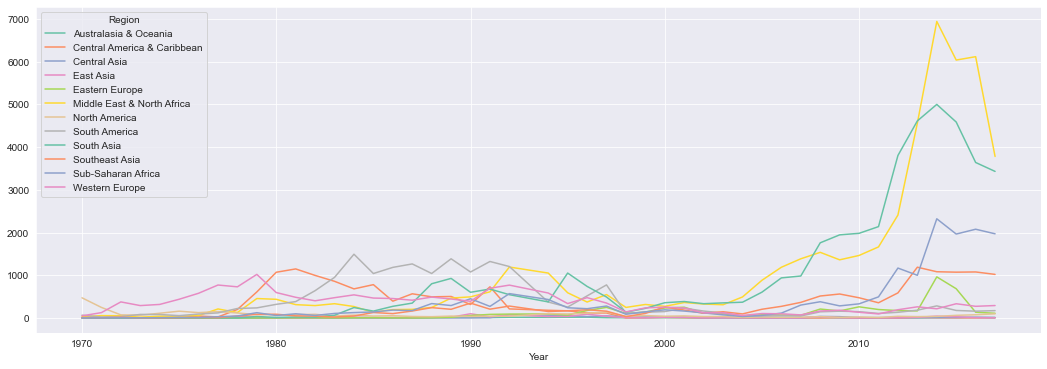

In [16]:
regional_trend=pd.crosstab(terrorism_df.Year,terrorism_df.Region)
regional_trend.plot(color=sns.color_palette('Set2'));
fig=plt.gcf()
fig.set_size_inches(18,6)


<a id='RegionVSATTACK'></a>
# What  Region has faced which type of attack?
In the middle, east Bombings dominate other forms of attack significantly. Similarly, South Asia is high on armed assault and bombings.

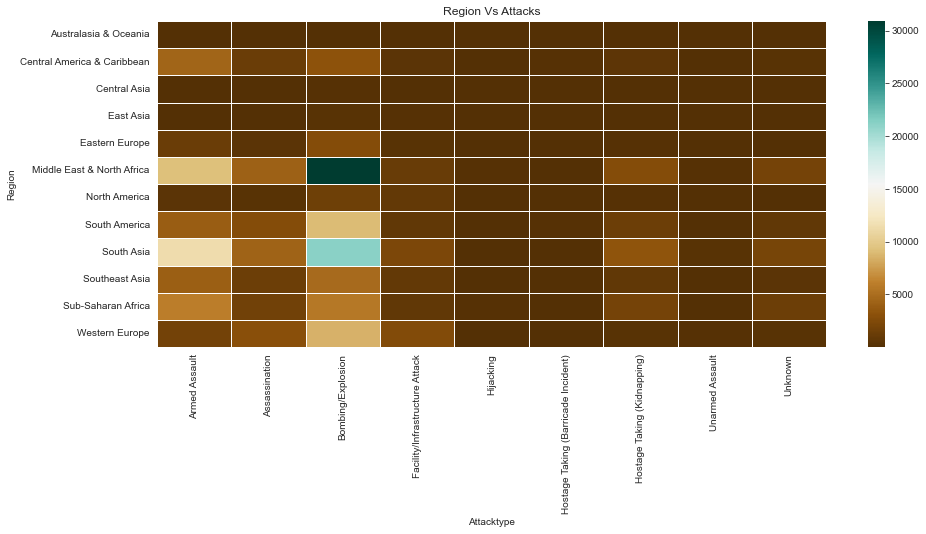

In [17]:
group_type_attacks=pd.crosstab(terrorism_df.Region,terrorism_df.Attacktype)
group_type_attacks
plt.figure(figsize=(15,6))
sns.heatmap(group_type_attacks,fmt="d",linewidths=.5, cmap='BrBG').set_title("Region Vs Attacks");

<a id ='WeaponsFav'></a>
# Favorite Weapons used:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


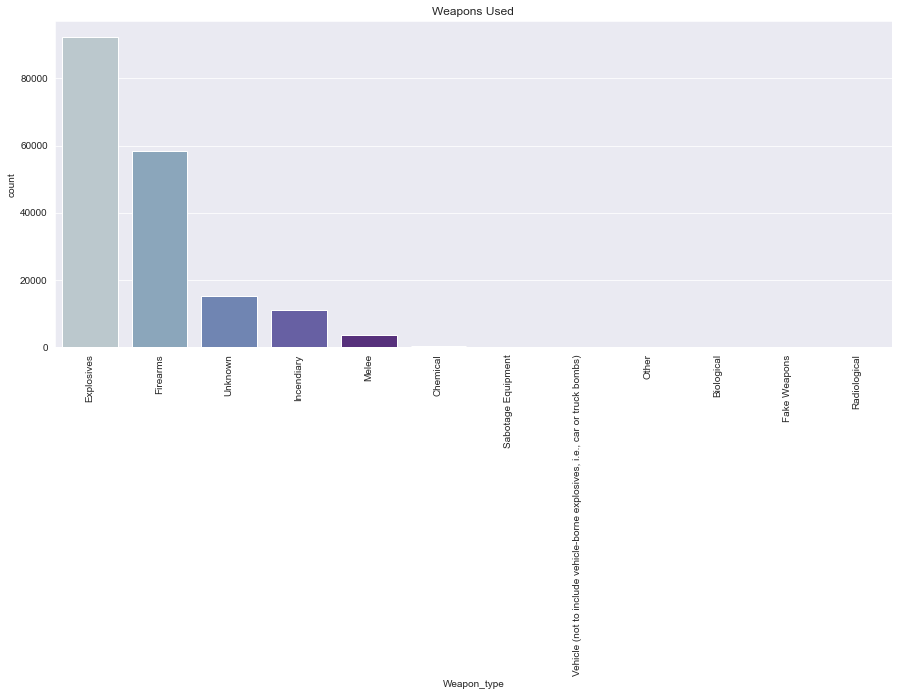

In [18]:
plt.figure(figsize=(15,6))
sns.countplot('Weapon_type',data=terrorism_df,palette='twilight',order=terrorism_df['Weapon_type'].value_counts().index).set_title("Weapons Used")
plt.xticks(rotation=90);

<a id='India'></a>
#             Analysis on India.

Terrorism in India, according to the Home Ministry, poses a significant threat to the people of India. Compared to other countries, India faces a wide range of terror groups. Terrorism found in India includes Islamic terrorism, separatist terrorism, and left wing terrorism India is one of the countries most impacted by terrorism.

**Grouping of Data**

In [19]:
Grouped=terrorism_df.groupby(terrorism_df.Country)
India=Grouped.get_group('India')
India 

,Year,Month,Country,Day,Region,State,City,Success,Attacktype,Target,Nationality,Group_Name,Weapon_type,latitude,longitude,motive
1186,1972,2,India,22,South Asia,Delhi,New Delhi,1,Hijacking,Airports & Aircraft,Germany,Palestinians,Explosives,28.585836,77.153336,NaN
2764,1975,1,India,2,South Asia,Bihar,Samastipur,1,Bombing/Explosion,Government (General),India,Ananda Marga,Explosives,25.863042,85.781004,Unknown
3857,1976,5,India,26,South Asia,Delhi,New Delhi,1,Bombing/Explosion,Airports & Aircraft,India,Unknown,Explosives,28.585836,77.153336,NaN
5327,1977,9,India,28,South Asia,Maharashtra,Bombay,1,Hijacking,Airports & Aircraft,Japan,Japanese Red Army (JRA),Firearms,19.075984,72.877656,NaN
9053,1979,8,India,8,South Asia,Andhra Pradesh,Amapur,1,Unknown,Private Citizens & Property,India,Mizo National Front,Unknown,16.435329,77.831725,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174444,2017,5,India,3,South Asia,Maharashtra,Hemalkasa,1,Bombing/Explosion,Police,India,Maoists,Explosives,19.427350,80.574050,NaN
174445,2017,5,India,3,South Asia,Maharashtra,Koparshi,1,Armed Assault,Police,India,Maoists,Firearms,19.568053,80.660659,NaN
174448,2017,5,India,3,South Asia,Jammu and Kashmir,Wahibugh,1,Facility/Infrastructure Attack,Business,India,Unknown,Firearms,33.894086,74.857241,NaN
174411,2017,5,India,2,South Asia,Jammu and Kashmir,Shopian,1,Facility/Infrastructure Attack,Government (General),India,Unknown,Unknown,33.721287,74.831062,NaN


<a id='TerrorismTrendIndia'></a>
# Terrorism Trend over the Years in India.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


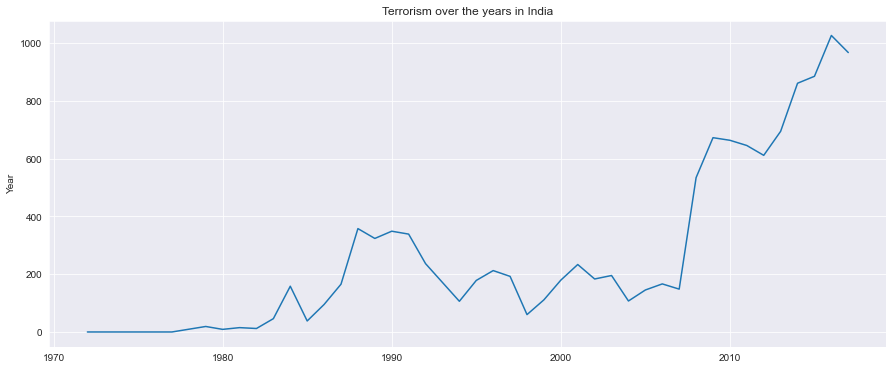

In [20]:
time=India.Year.value_counts()
time=time.sort_index()
plt.figure(figsize=(15,6))
sns.lineplot(time.index,time).set_title('Terrorism over the years in India');


There has been a steady increase in terrorism over the years with its peaking hitting in the last decade. Past 2016 or 2017 there seems to a Gradual slowing in terrorist attacks all across India.

<a id='Succesfulvsuncessful'></a>
# % of attacks successful vs non Successful.
India has done a good job so far in stopping terrorist attacks. India has stopped 14% of its attacks over the couse of fifty years which is impressive considering its size and population.

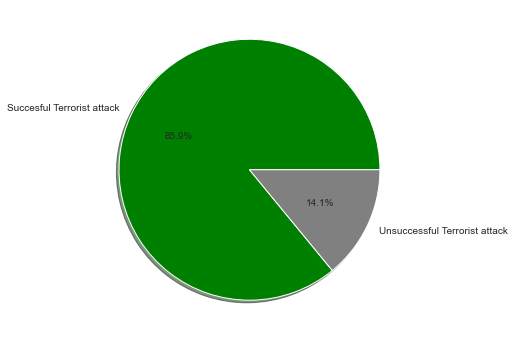

In [21]:
Indiasuccess=India.Success.value_counts()
Succesful_perctange_attacks=Indiasuccess[1]/sum(Indiasuccess)*100
Succesful_perctange_attacks=round(Succesful_perctange_attacks,2)
Failures_percentage_attacks=100-Succesful_perctange_attacks
attacks_india=[Succesful_perctange_attacks,Failures_percentage_attacks]
label_india=['Succesful attack%','Unsuccesful attack%']
plt.figure(figsize=(15,6))
plt.pie(attacks_india, colors=['green','Gray'],shadow=True,labels=label, autopct='%1.1f%%');


<a id ='TerroristgroupsIndia'></a>
# Terrorist groups with their favorite attack types.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


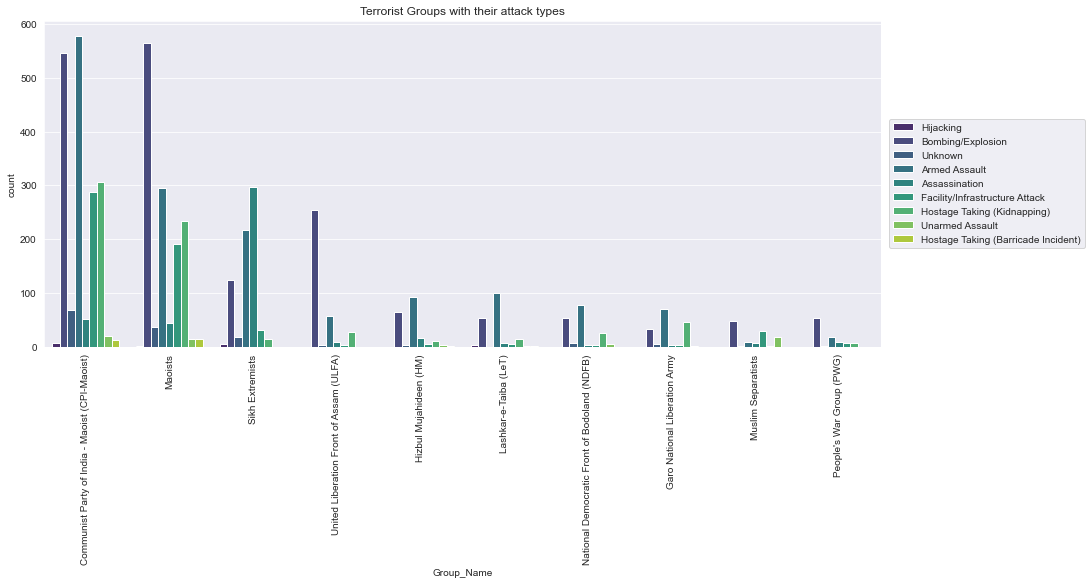

In [22]:
plt.figure(figsize=(15,6))
plt.title('Terrorist Groups with their attack types')
Indian_terrorist_groups=sns.countplot(India.Group_Name,data=India,order=India['Group_Name'].value_counts()[1:11].index,palette='viridis',hue=India.Attacktype).legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks(rotation=90);


<a id='CTCA'></a>
# Common Target vs Common Attack types 

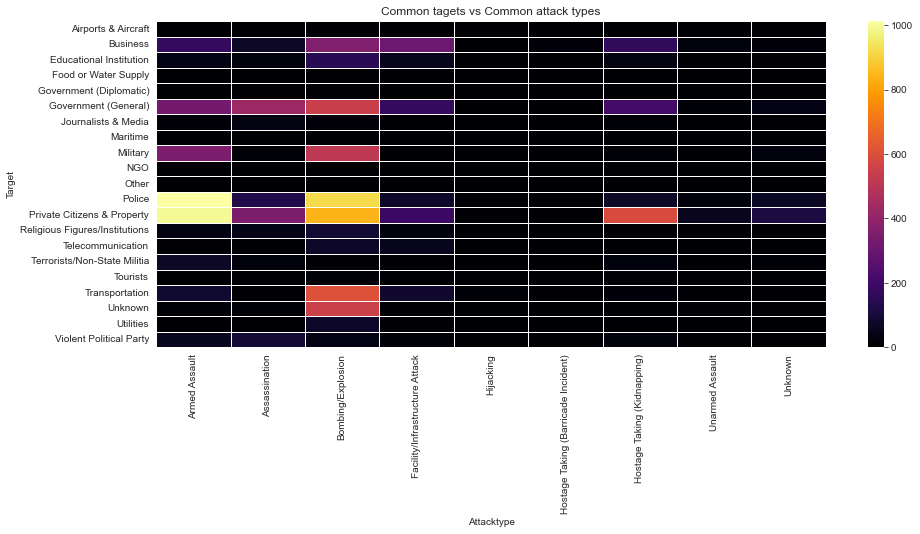

In [23]:
plt.figure(figsize=(15,6))
commonTagetandTypes=pd.crosstab(India.Target,India.Attacktype)
sns.heatmap(commonTagetandTypes,fmt="d",linewidths=.5, cmap='inferno').set_title('Common tagets vs Common attack types');

In [24]:
figcity=India.City.value_counts().head(10).index
figstate=India.State.value_counts().head(10).index

<a id="TCTS"></a>
# Top Cities and States with Terrorist activities.
Something is interesting in the cities graph, Srinagar has more records of terrorist activities than the collective of those attacks and activities not reported. simultaneously the difference the first state and second state is drastic Jammu and Kashmir way above than Assam.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


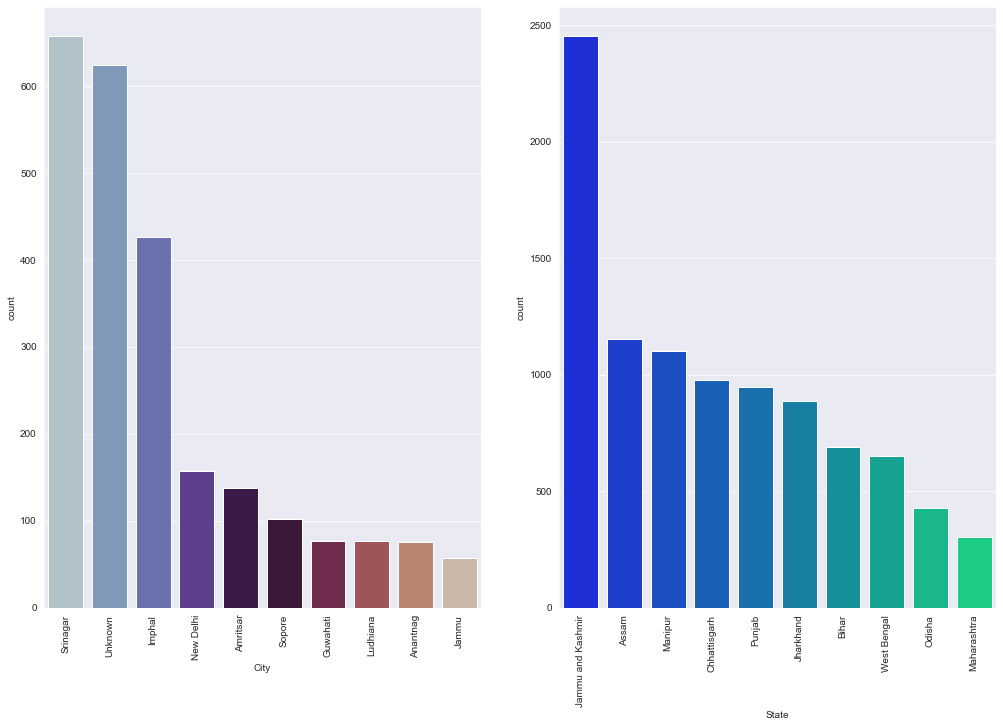

In [25]:
fig,axes=plt.subplots(1,2,figsize=(15,10))
plt.tight_layout(pad=5)
sns.countplot('City',data=India,palette='twilight',order=India.City.value_counts().head(10).index,ax=axes[0]).set_xticklabels(figcity,rotation=90);
sns.countplot('State',data=India,palette='winter',order=India.State.value_counts().head(10).index,ax=axes[1]).set_xticklabels(figstate,rotation=90);

<a id='Middleeast'></a>
# Middle East

Analysis of the Middle east.
If you look at the number's Middle east is the most affected Region when compared to others.
The most affected countries i.e Iraq, Afghanistan belong to Middle east
Most affected cities like Bagdad, Kabul all are from this region.

In [26]:
middlegroup=terrorism_df.groupby('Region')
MiddleEastAfrica=middlegroup.get_group('Middle East & North Africa')
MiddleEastAfrica

,Year,Month,Country,Day,Region,State,City,Success,Attacktype,Target,Nationality,Group_Name,Weapon_type,latitude,longitude,motive
486,1970,8,Turkey,31,Middle East & North Africa,Ankara,Ankara,1,Bombing/Explosion,Military,United States,Turkish People's Liberation Army,Explosives,39.930771,32.767540,NaN
487,1970,9,Jordan,0,Middle East & North Africa,Amman,Amman,1,Hostage Taking (Kidnapping),Military,United States,Palestinians,Unknown,31.950001,35.933331,NaN
328,1970,6,Jordan,7,Middle East & North Africa,Amman,Amman,0,Unknown,Military,United States,Unknown,Unknown,31.950001,35.933331,NaN
329,1970,6,Jordan,7,Middle East & North Africa,Amman,Amman,1,Hostage Taking (Kidnapping),Government (Diplomatic),United States,Popular Front for the Liberation of Palestine ...,Unknown,31.950001,35.933331,NaN
334,1970,6,Iran,9,Middle East & North Africa,Tehran,Tehran,1,Bombing/Explosion,Airports & Aircraft,Israel,Popular Front for the Liberation of Palestine ...,Explosives,35.724533,51.405190,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174430,2017,5,Iraq,3,Middle East & North Africa,Al Anbar,Hawr,0,Unknown,Military,Iraq,Islamic State of Iraq and the Levant (ISIL),Unknown,32.559761,41.919647,NaN
174429,2017,5,Iraq,2,Middle East & North Africa,Saladin,Samarra,1,Bombing/Explosion,Police,Iraq,Islamic State of Iraq and the Levant (ISIL),Explosives,34.208416,43.890713,NaN
174428,2017,5,Iraq,2,Middle East & North Africa,Al Anbar,Sakkara,1,Armed Assault,Military,Iraq,Islamic State of Iraq and the Levant (ISIL),Explosives,33.036027,40.466367,NaN
174410,2017,5,Egypt,2,Middle East & North Africa,North Sinai,Arish,1,Bombing/Explosion,Food or Water Supply,Egypt,Sinai Province of the Islamic State,Explosives,31.126646,33.800865,NaN


In [27]:
MiddleEastAfrica.isnull().sum()


Year               0
Month              0
Country            0
Day                0
Region             0
State              0
City               0
Success            0
Attacktype         0
Target             0
Nationality        0
Group_Name         0
Weapon_type        0
latitude         897
longitude        897
motive         34947
dtype: int64

In [28]:
MiddleEastAfrica['motive'].fillna('Unknown',inplace=True);

<ipython-input-28-a5ff57f50f27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MiddleEastAfrica['motive'].fillna('Unknown',inplace=True);


<a id='MiddleEastvsworld'></a>
# Terrorism In middle east Vs the World

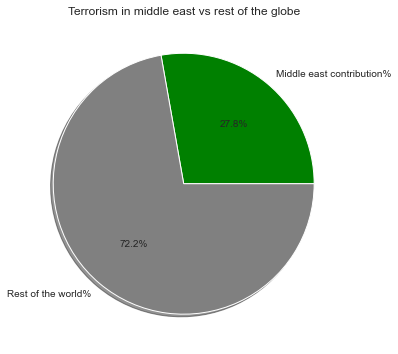

In [29]:
middleeastcontribution=terrorism_df.Region.value_counts().head(1)/terrorism_df.Region.value_counts().sum()*100
middleeastcontribution=round(middleeastcontribution,2).tolist()
restoftheworld=100-middleeastcontribution[0]
middleeastcontribution.append(restoftheworld)
label_middle=['Middle east contribution%','Rest of the world%']
plt.figure(figsize=(15,6))
plt.title('Terrorism in middle east vs rest of the globe')
plt.pie(middleeastcontribution, colors=['green','Gray'],shadow=True,labels=label_middle, autopct='%1.1f%%');

Well, it was obvious that the numbers would be high but the calculations show that the Middle east contribute to 27% of all the crimes constituted till date.

<a id='METrend'></a>
# Trend of Terrorism In Middle East & North Africa  over the Years

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


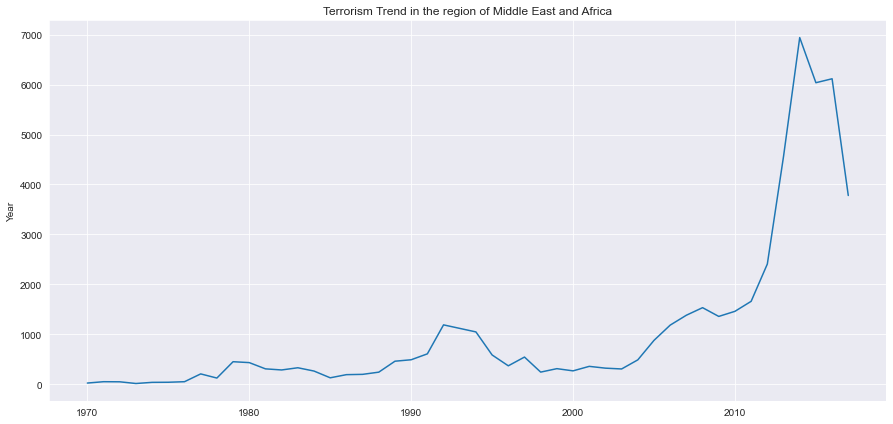

In [30]:
Terrorism_over_years=MiddleEastAfrica.Year.value_counts()
Terrorism_over_years=Terrorism_over_years.sort_index()
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.lineplot(Terrorism_over_years.index,Terrorism_over_years).set_title('Terrorism Trend in the region of Middle East and Africa');


There has been a  slow and stedy increse in terrorism over the years how ever post 2003 there is a huge surge in terrorism post 2009 and the level reaching new peak after 2010. However there is a steep decline in the Graph post 2015.

<a id='Middlecountries'></a>
# Most effected Countries in Middle East and North Africa.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


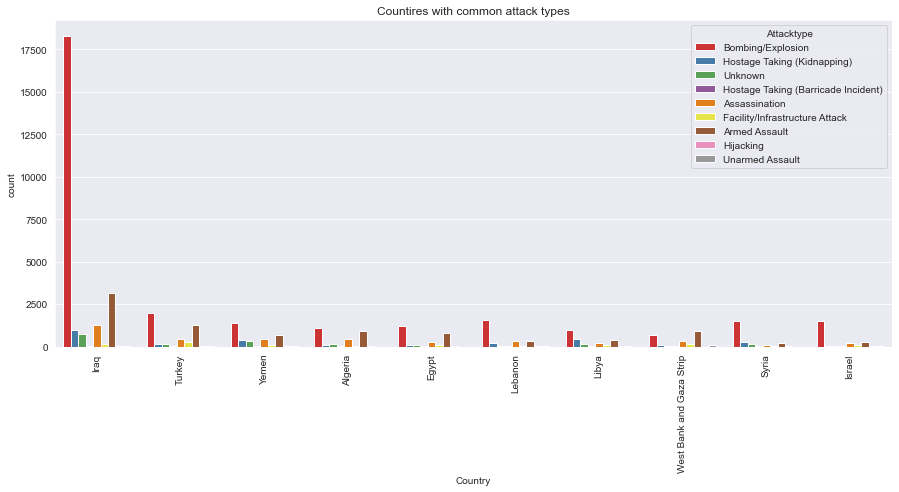

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(MiddleEastAfrica.Country,order=MiddleEastAfrica['Country'].value_counts()[:10].index,data=MiddleEastAfrica,palette='Set1',hue=MiddleEastAfrica.Attacktype).set_title('Countires with common attack types')
plt.xticks(rotation=90);

<a id='MeCi'></a>
# Hotspot Cities in Middle East and North Africa.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


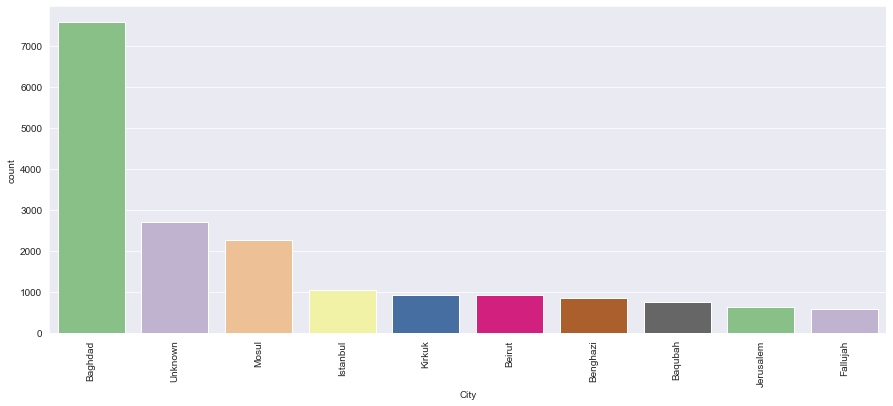

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(MiddleEastAfrica.City,data=MiddleEastAfrica,order=MiddleEastAfrica['City'].value_counts()[:10].index,palette='Accent');
plt.xticks(rotation=90);


Baghdad has reportedly more terrorist activities than the non reported crimes all over the Middle East and Northern Africa. Indicating either of two factors either the Terrorism activities happening in Baghdad is usually on a high threat level that gets noticed or since Baghdad being home to major terrorist groups like ISIS, the International News/Media or UN has their eyes glued onto it.

<a id='CACTME'></a>
# Common Attack Types vs Common Targets.

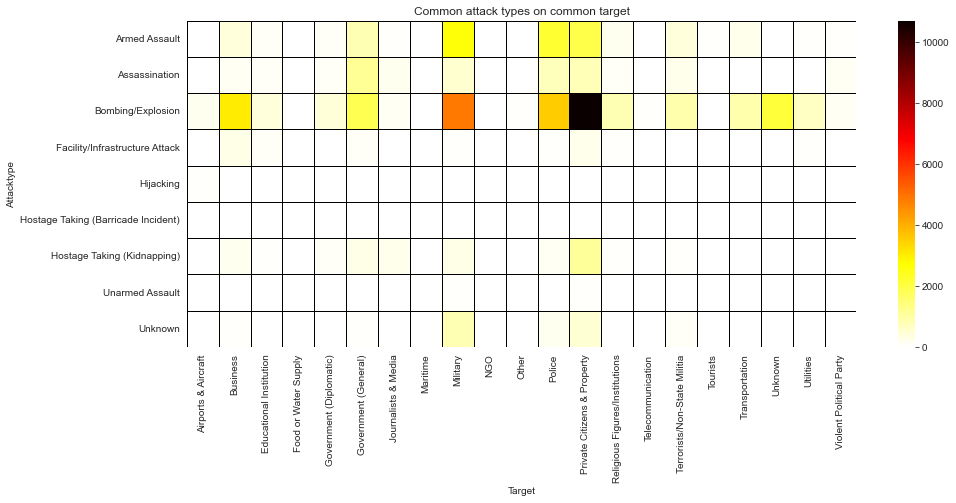

In [33]:
AttackXTarget=pd.crosstab(MiddleEastAfrica.Attacktype,MiddleEastAfrica.Target)
AttackXTarget
plt.figure(figsize=(15,6))
sns.heatmap(AttackXTarget,fmt='d',linewidths=0.5,cmap='hot_r',linecolor='black').set_title('Common attack types on common target');

Lastly I would like to thank all of you for having a look at this notebook.

If you liked it or learnt something from it, PLEASE UPVOTE, as it will keep me motivated for doing better.